In [89]:
from sklearn.datasets import load_svmlight_file
import numpy as np

In [90]:
data=load_svmlight_file(r'F:\\机器学习实验\\australian_scale.txt')

In [91]:
X=data[0]
y=data[1]

In [92]:
X=X.todense()

In [93]:
y=np.reshape(y,(690,1))
y=np.mat(y)

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_validation,y_train,y_validation=train_test_split(X,y,test_size=0.3,random_state=47)#分割数据集

In [95]:
n=X_train.shape[0]
X_train=np.hstack((X_train,np.ones((n,1))))#在X最后一列添加一列1，让w和b合并
X_train.shape

(483, 15)

In [96]:
n=X_validation.shape[0]
X_validation=np.hstack((X_validation,np.ones((n,1))))
X_validation.shape

(207, 15)

In [113]:
def hingeloss(X,w,y):#hinge loss: w+C*sum(max(0,1-y*(x*w+b)))
    s=0
    for i in range(0,len(w)):
        s=s+w[i]**2
    for i in range(0,len(y)):
        s+=max(0,1-y[i]*(X[i]*w))
    return s[0,0]

In [108]:
def loss(X,w,y):#使用误差率作为loss，阈值为0
    y_predict=X*w
    error_rate=0
    for i in range(0,len(y)):
        if(y_predict[i]>=0):
            y_predict[i]=1
        else:
            y_predict[i]=-1
        if(y_predict[i]!=y[i]):
            error_rate+=1
    return error_rate/len(y)

In [109]:
def gradient(X,w,y):
    (n,m)=X.shape
    s=np.zeros((m,1))
    w[X.shape[1]-1]=0
    '''分类算每个样本的梯度'''
    for j in range(0,n-1):
        if(1-X[j]*w*y[j]>0):
            s=s+(X[j].T*y[j])*-1
    return s+w

In [110]:
def train(X_train,X_validation,y_train,y_validation,it,LearningRate):
    #X维度n*m y维度n*1 n为样本数 m为特征数  X_train,y_train,X_validation,y_validation为分割后的数据集
    w=np.ones((X_train.shape[1],1))# w初始化为1 维度m*1
    loss_train=[]
    loss_validation=[]
    rate_train=[]
    rate_validation=[]
    time=[]
    for i in range(0,it):#it次迭代
        time.append(i+1)
        gra=gradient(X_train,w,y_train)
        w=w-LearningRate*gra
        err_train=0
        err_validation=0
        train_rate=0
        validation_rate=0
        loss_train.append(hingeloss(X_train,w,y_train))
        loss_validation.append(hingeloss(X_validation,w,y_validation))
        rate_train.append(loss(X_train,w,y_train))
        rate_validation.append(loss(X_validation,w,y_validation))
    return time,loss_train,loss_validation,rate_train,rate_validation,w

In [121]:
time,loss_train,loss_validation,errorrate_train,errorrate_validation,w=train(X_train,X_validation,y_train,y_validation,20,0.001)

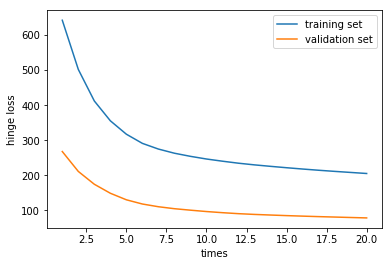

In [122]:
import matplotlib.pyplot as plt
plt.xlabel('times')
plt.ylabel('hinge loss')
plt.plot(time,loss_train,label='training set')
plt.plot(time,loss_validation,label='validation set')
plt.legend()
plt.show()

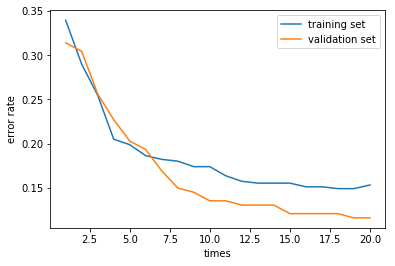

In [123]:
plt.xlabel('times')
plt.ylabel('error rate')
plt.plot(time,errorrate_train,label='training set')
plt.plot(time,errorrate_validation,label='validation set')
plt.legend()
plt.show()

In [124]:
min(loss_train)

204.90927895880651

In [125]:
min(loss_validation)

78.065188765176472

In [126]:
min(errorrate_train)

0.14906832298136646

In [127]:
min(errorrate_validation)

0.11594202898550725